In [2]:
import pickle 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import fits
from collections import OrderedDict

In [3]:
#sources_list = ['AS205','CITau','DoAr25','DoAr33','FZTau','GKTau','HD143006','HPTau','IQTau','IRAS04385','WSB52']

#pathspec = '/home/annie/Dropbox/Vassar/Research/COAnalysis/NIRSPECdata' #linux path where spectra are located
#pathspec = '/Users/adicksonvandervelde/Dropbox/Vassar/Research/COAnalysis/NIRSPECdata'
#pathspec = '/Users/adicksonvandervelde/Dropbox/Vassar/Research/COAnalysis/NIRSPECdata'

pathspec = '/Users/belaarwen/Desktop/Vassar/Classes/Astronomy/Thesis/NIRSPECdata'

age = False                                                              # True = all, False = just class II/III
names = np.loadtxt('/Users/belaarwen/Desktop/Vassar/Classes/Astronomy/Thesis/NIRSPECdata/NIRSPECinfo.csv',usecols=0,delimiter=',',dtype='str')

spec_d = {}                                                              #dictionary of spectra for easy iteration
if age == True:                                                          #grabs entire folder of spectra
    for filename in os.listdir(pathspec):
        f = os.path.join(pathspec,filename)
        if filename == '.DS_Store':                                      #ignore this, lol
            blue = 1                                                     #an extraneous file in my folder
        elif os.path.isfile(f):
            y = filename.replace('_glue.dat','');name = y.replace('nirspec_','')
            wavelength, flux = np.loadtxt(f,skiprows=27,unpack=True)     #read data from file
            data = [wavelength,flux]                                     #merge data
            spec_d[name] = data                                          #write to dictionary
else:
    for filename in os.listdir(pathspec):                                #grabs only Class Is
        f = os.path.join(pathspec,filename)
        if filename == '.DS_Store':
            blue = 1
        elif os.path.isfile(f):
            y = filename.replace('_glue.dat','');name = y.replace('nirspec_','')
            if any(x==name for x in names) == True:                      #checks if filename is in list of names
                wavelength, flux = np.loadtxt(f,skiprows=27,unpack=True) #read data from file
                data = [wavelength,flux]                                 #merge data
                spec_d[name] = data  #write to dictionary
        
spec_d = OrderedDict(sorted(spec_d.items()))                             #puts dictionary in alphabetical order

/var/folders/d3/9580gqn56b17v4gf2h27z1vr0000gn/T/ipykernel_22052/2141445267.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(i+1,figsize=(12,8))               #create the ith figure


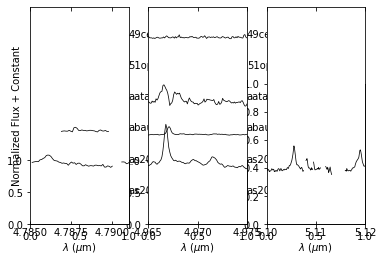

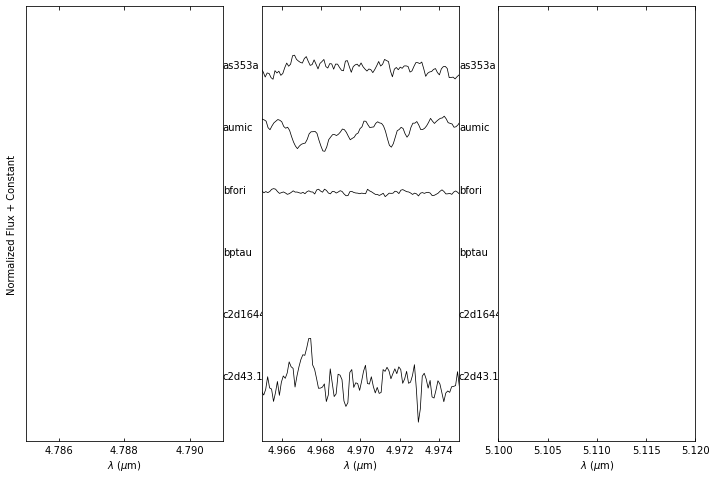

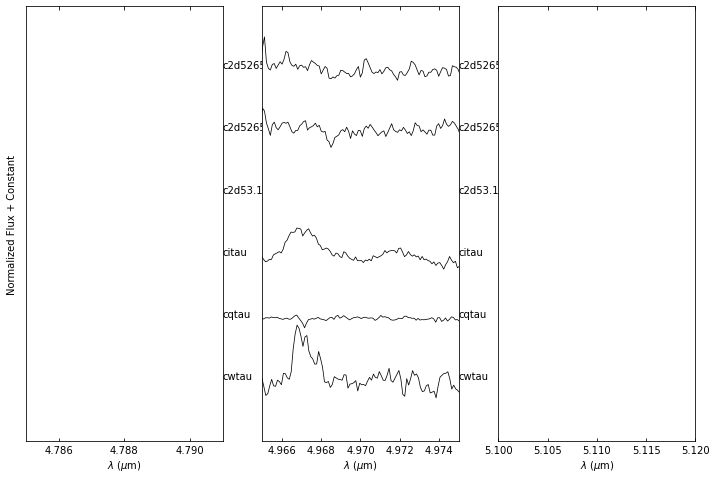

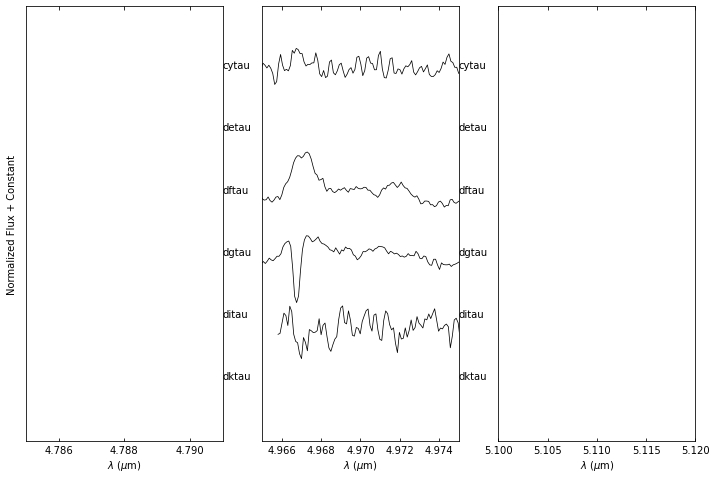

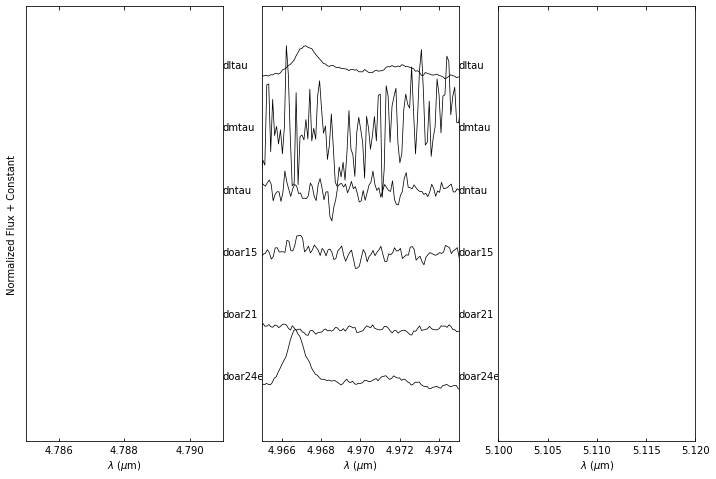

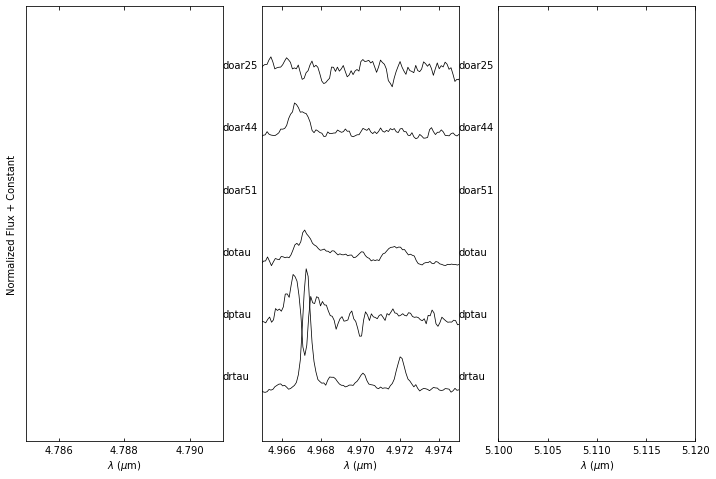

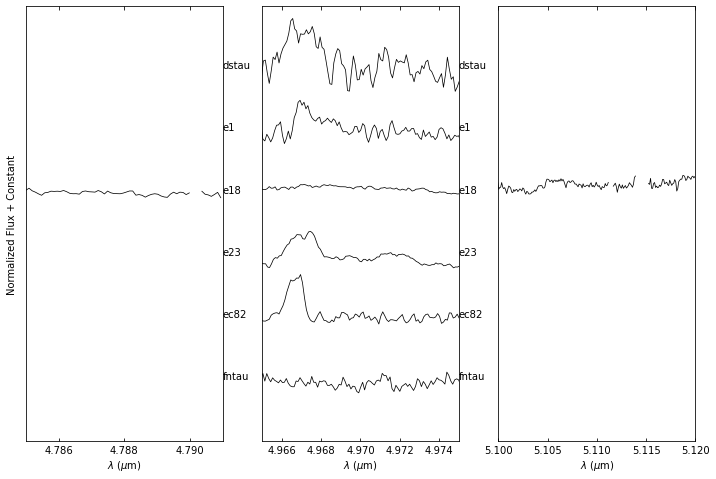

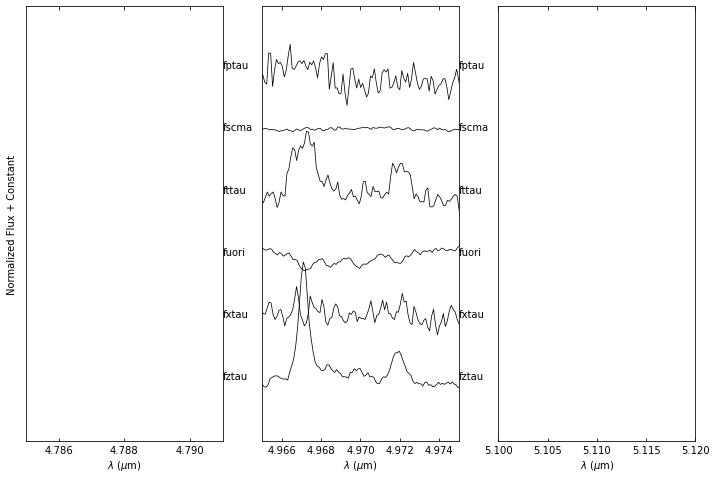

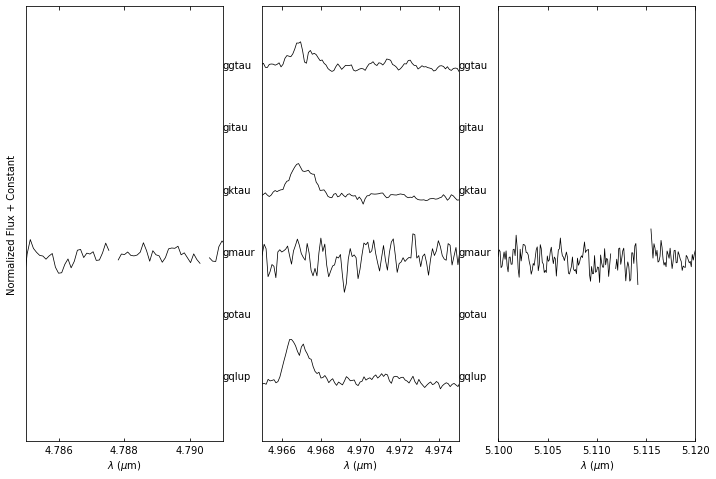

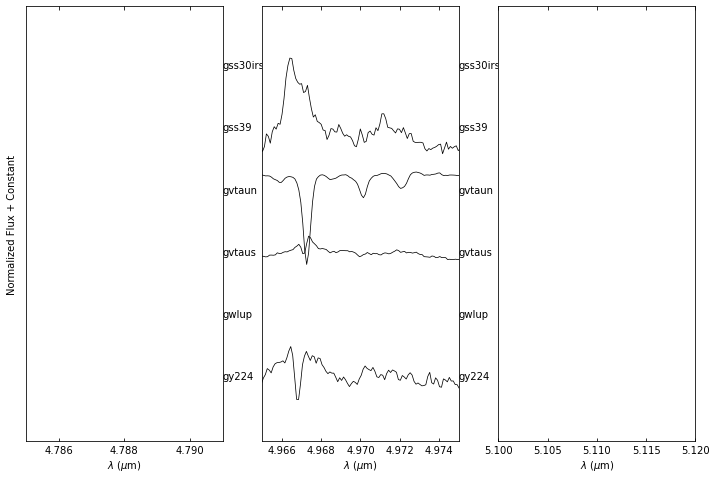

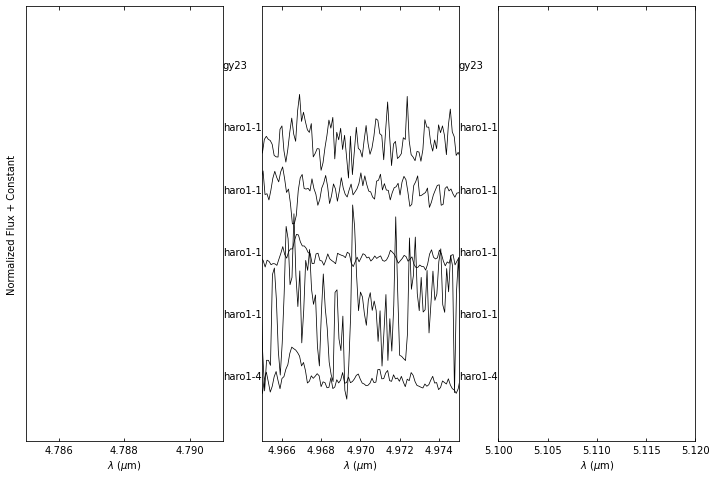

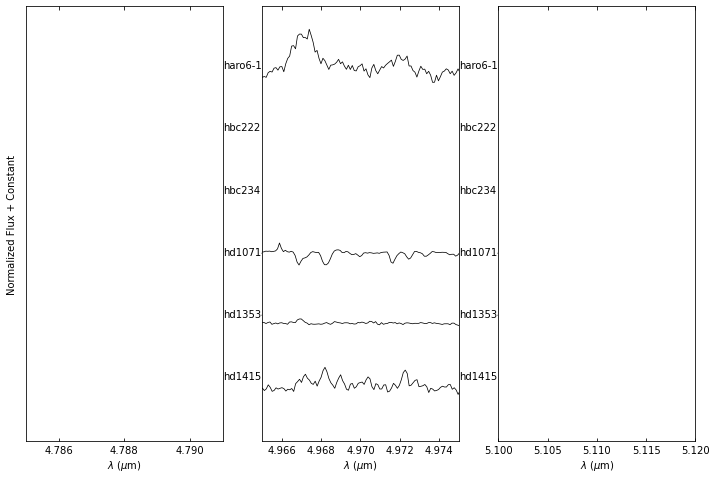

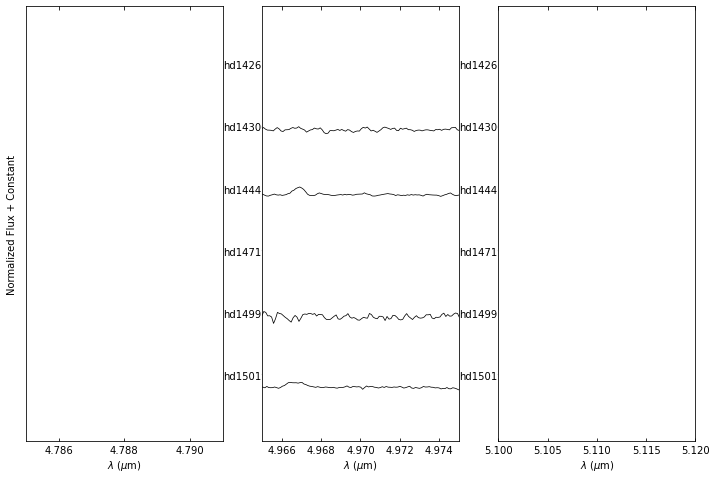

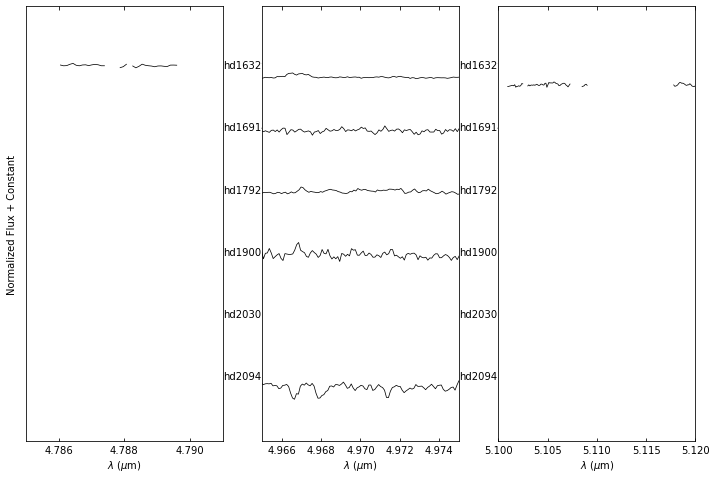

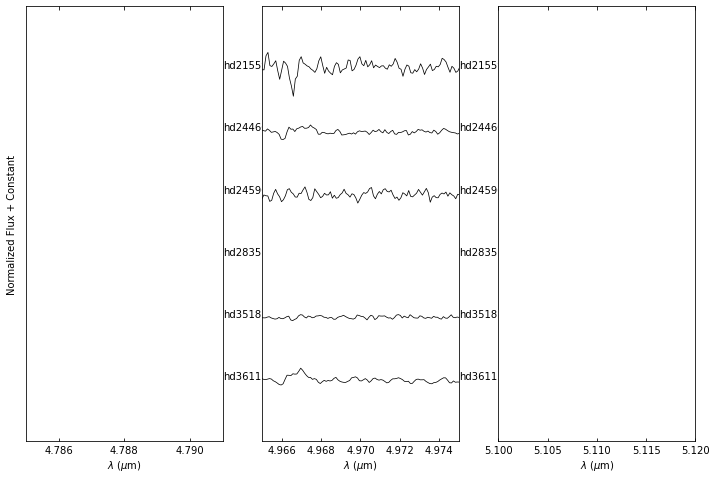

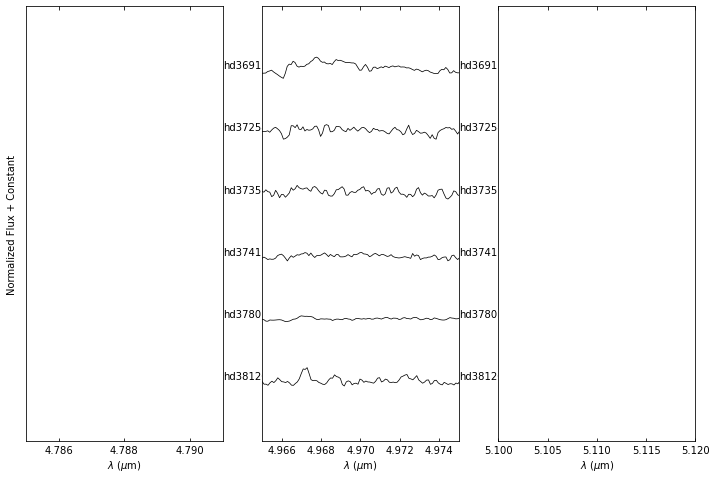

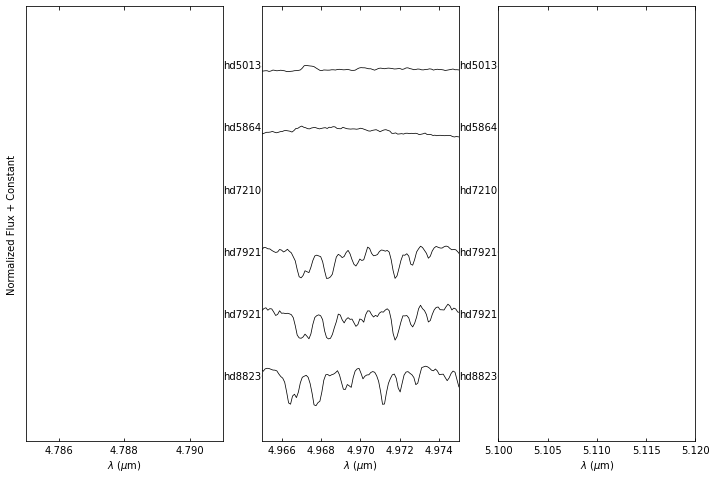

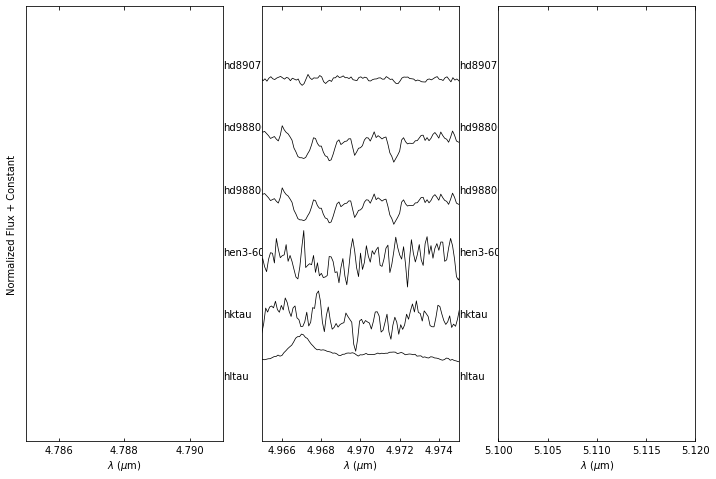

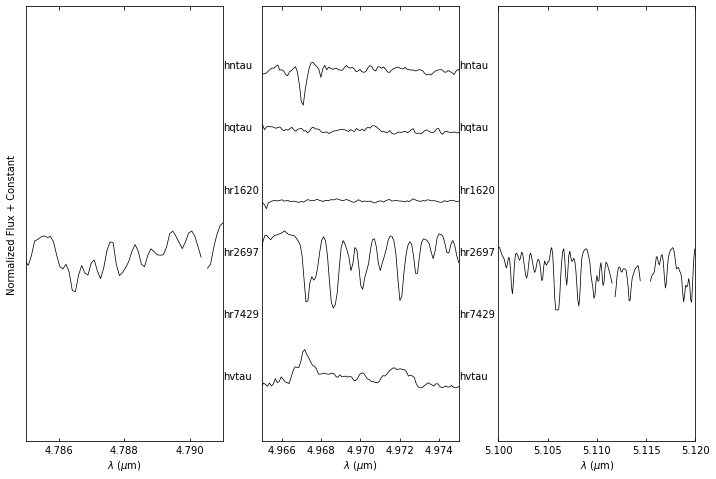

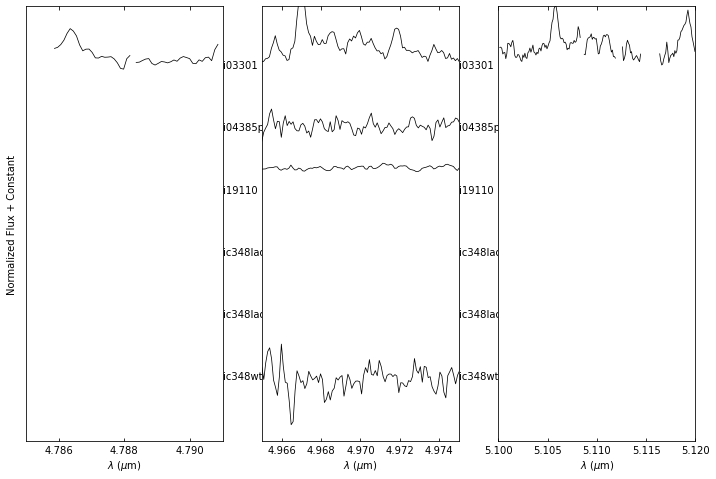

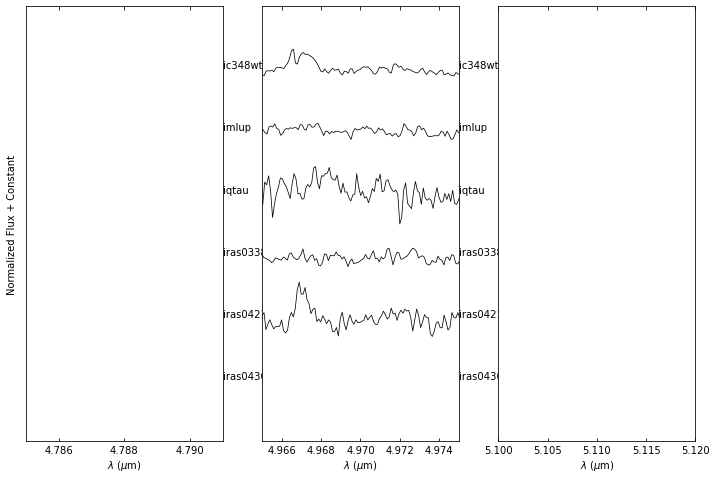

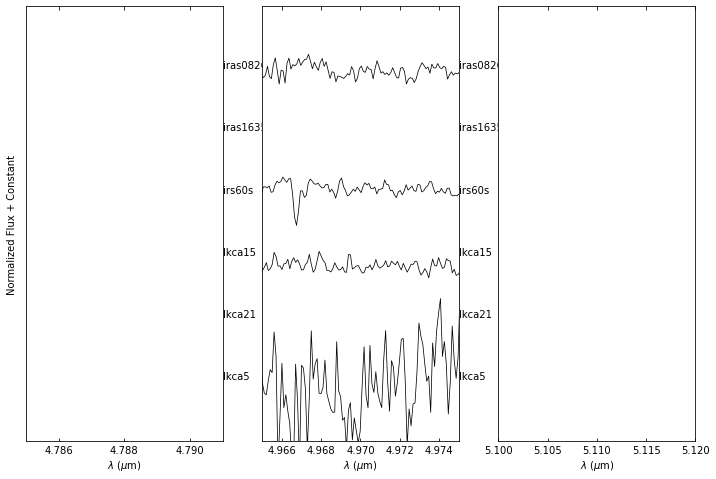

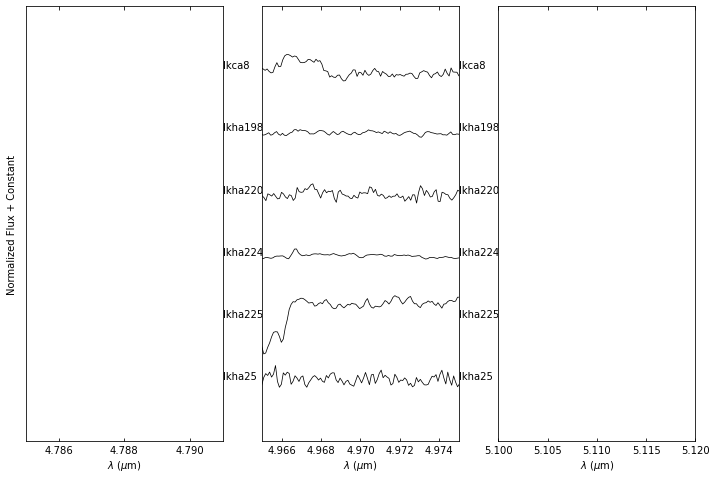

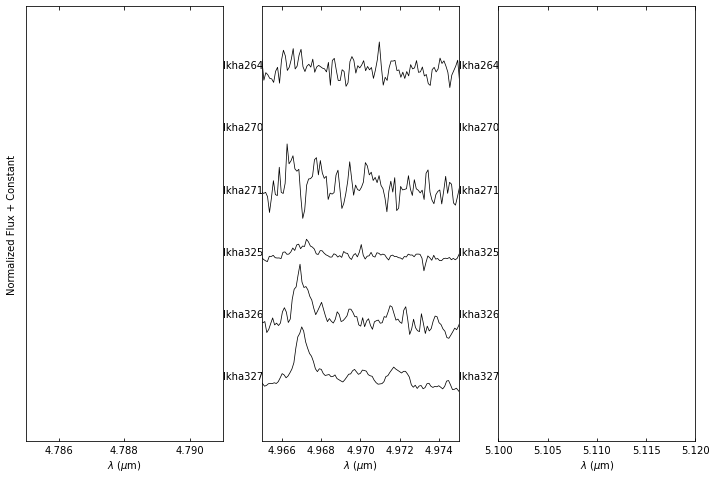

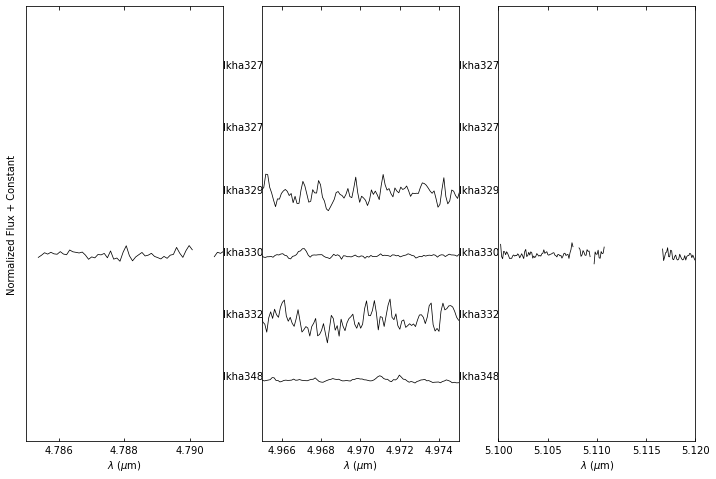

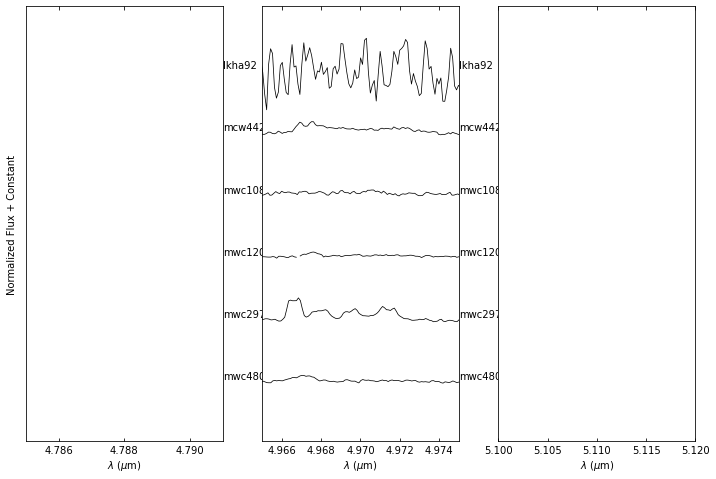

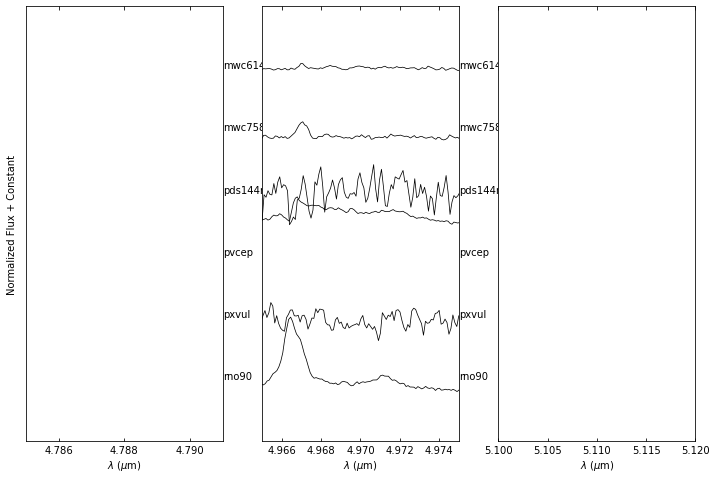

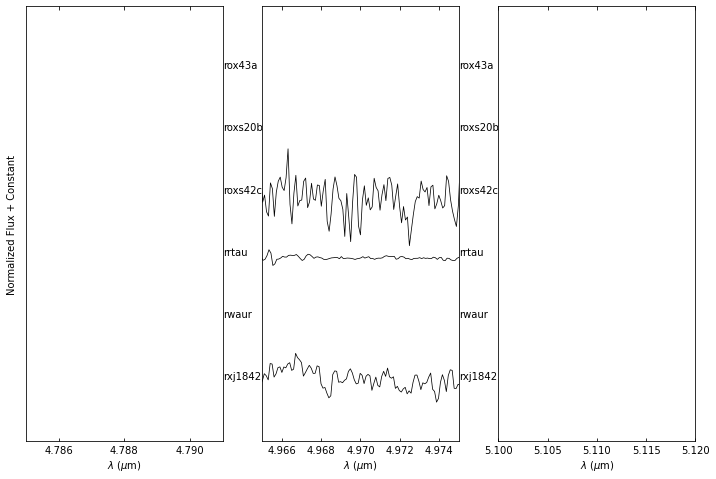

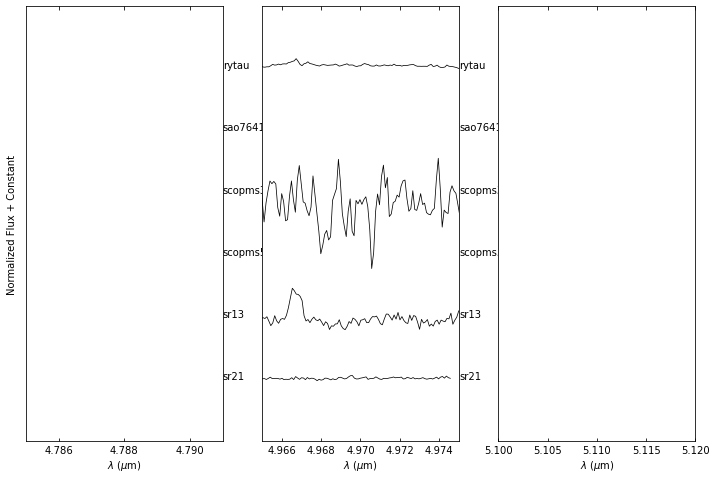

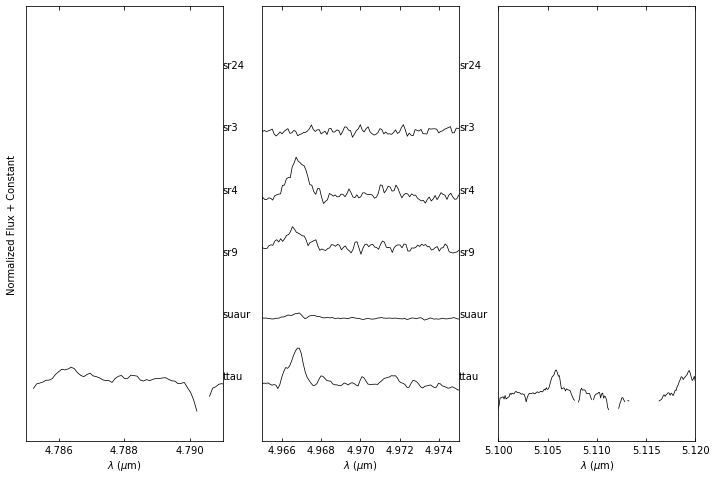

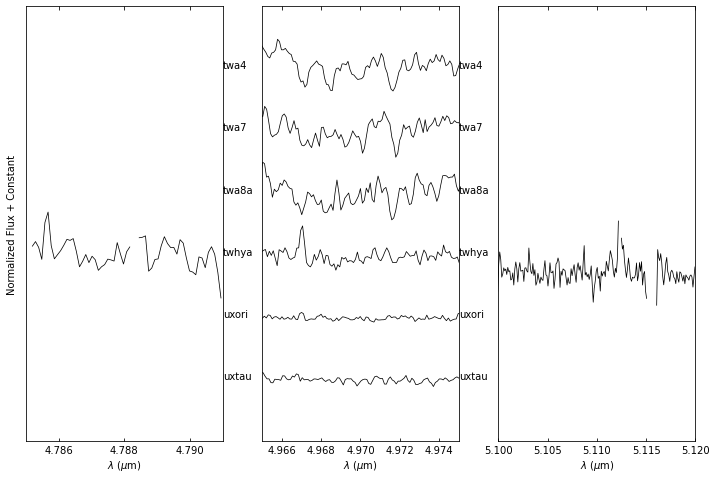

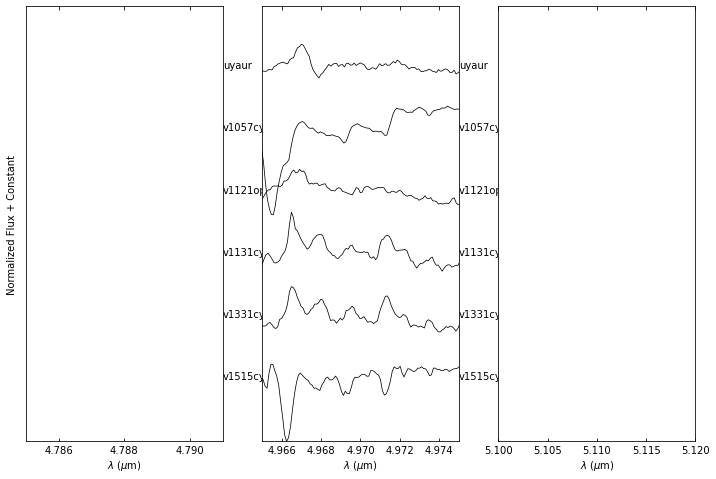

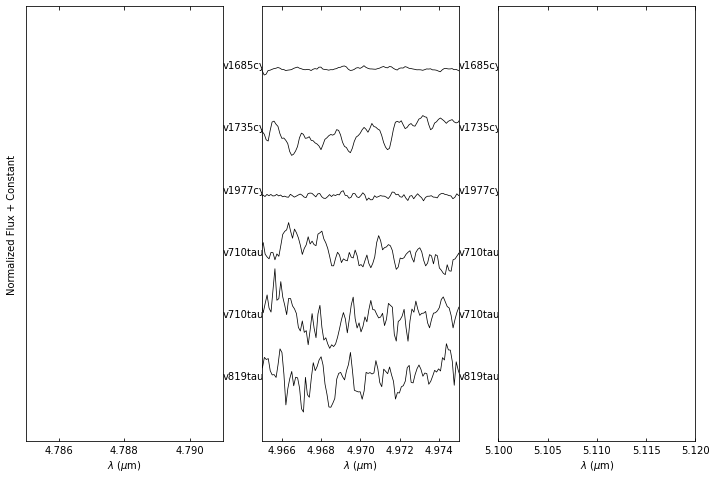

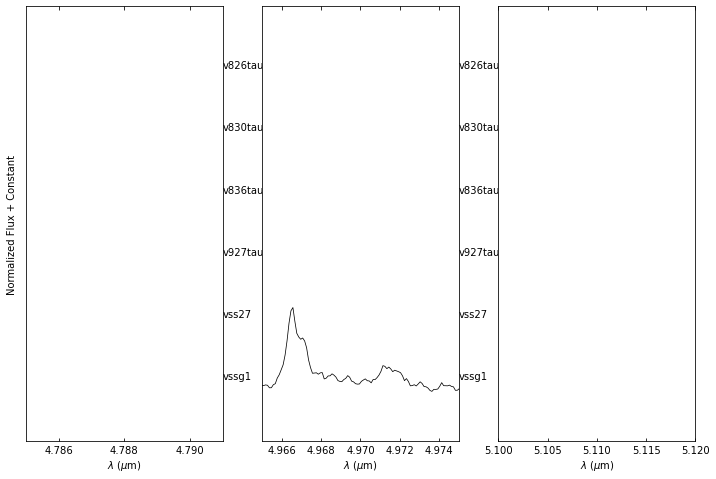

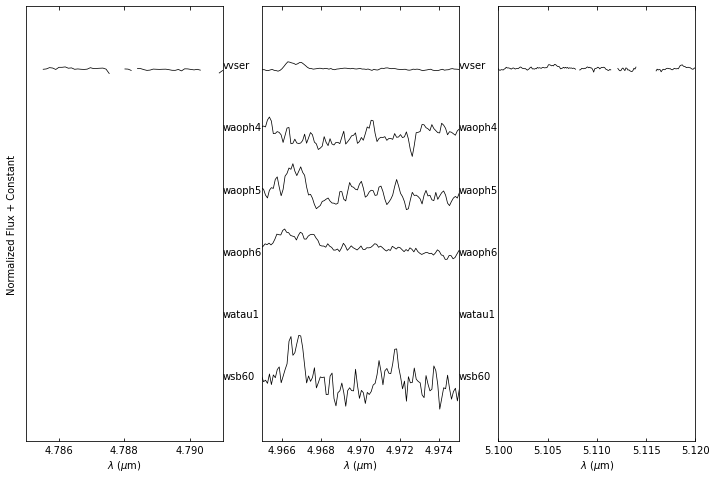

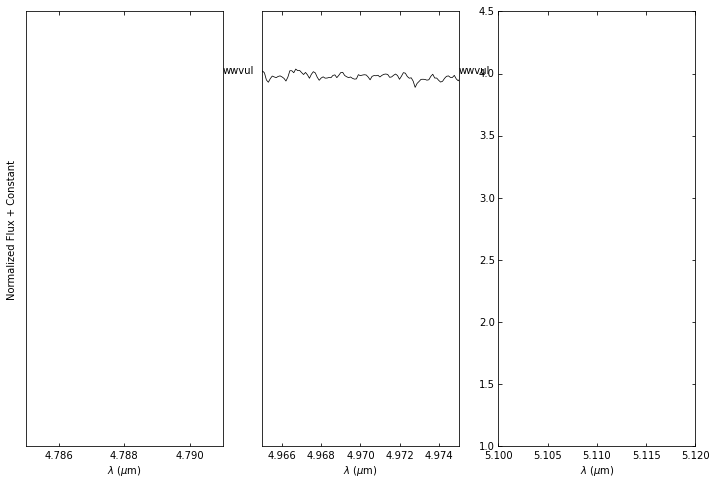

In [6]:
lower_limit_1 = 4.785
upper_limit_1 = 4.791

lower_limit_2 = 4.965
upper_limit_2 = 4.975

lower_limit_3 = 5.1
upper_limit_3 = 5.12

N = int(len(spec_d)/6)                                 #divide number of spectra by 6
N0 = len(spec_d)%6                                     #find number of remaining spectra
n = 0                                                  #to count through dictionary through mutliple loops

ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

for i in range(N):                                     #create N figures
    fig = plt.figure(i+1,figsize=(12,8))               #create the ith figure
    gs = GridSpec(1,3)
    ax1 = host_subplot(gs[0, 0],axes_class=AA.Axes)
    ax2 = host_subplot(gs[0, 1],axes_class=AA.Axes)
    ax3 = host_subplot(gs[0, 2],axes_class=AA.Axes)
    for j in range(6):                                  #plotting loop for the 6 spectra
        offset = (6 - j)*0.5                            #setting position on graph
        spot = list(spec_d.items())[n]                  #calls the nth key of the dictionary
        name = spot[0]                                  #grabs the name from the dictionary "entry"
        wave,flux = spot[1]                             #grabs the wavelength and flux
        fix_flux = flux[np.logical_not(np.isnan(flux))] #remove fluxes
        avg_flux = np.average(fix_flux)                 #finds average flux value
        normflux = np.divide(flux,avg_flux)             #normalizes flux so average flux  = 1
        sflux = normflux+offset                         #offsets normalized flux
        ax1.plot(wave,sflux,'k',linewidth=.75);ax2.plot(wave,sflux,'k',linewidth=.75);ax3.plot(wave,sflux,'k',linewidth=.75)
        ax1.text(upper_limit_1,offset+1,name)           #put obj name in between subplots
        ax2.text(upper_limit_2,offset+1,name)
        n+=1                                            #next dictionary value
        
    ax1.set_xlim(lower_limit_1,upper_limit_1);ax1.set_ylim(1,4.5);ax1.get_yaxis().set_ticks([])
    ax1.set_xlabel('$\lambda$ ($\mu$m)');ax1.set_ylabel('Normalized Flux + Constant')
    
    ax2.set_xlim(lower_limit_2, upper_limit_2);ax2.set_ylim(1,4.5);ax2.get_yaxis().set_ticks([])#
    ax2.set_xlabel('$\lambda$ ($\mu$m)')
 
    ax3.set_xlim(lower_limit_3, upper_limit_3);ax3.set_ylim(1,4.5);ax3.get_yaxis().set_ticks([])
    ax3.set_xlabel('$\lambda$ ($\mu$m)')

if N0 > 0:                                              #create a final figure with any remaining spectra
    fig = plt.figure(i+2,figsize=(12,8))                #create final figure
    gs = GridSpec(1,3)
    ax1 = host_subplot(gs[0, 0],axes_class=AA.Axes)
    ax2 = host_subplot(gs[0, 1],axes_class=AA.Axes)
    ax3 = host_subplot(gs[0, 2],axes_class=AA.Axes)
    for j in range(N0):                                 #add final spectra to fig
        offset = (6 - j)*0.5                            #setting position on graph
        spot = list(spec_d.items())[n]                  #calls the nth key of the dictionary
        name = spot[0]                                  #grabs the name from the dictionary "entry"
        wave,flux = spot[1]                             #grabs the wavelength and flux
        fix_flux = flux[np.logical_not(np.isnan(flux))] #remove nan fluxes
        avg_flux = np.average(fix_flux)                 #finds average flux value
        normflux = np.divide(flux,avg_flux)             #normalizes flux so average flux  = 1
        sflux = normflux+offset                         #offsets normalized flux
        ax1.plot(wave,sflux,'k',linewidth=.75);ax2.plot(wave,sflux,'k',linewidth=.75);ax3.plot(wave,sflux,'k',linewidth=.75)
        ax1.text(upper_limit_1,offset+1,name)           #put obj name in between subplots
        ax2.text(upper_limit_2,offset+1,name)
        n+=1                                            #next dictionary value
                            
    ax1.set_xlim(lower_limit_1, upper_limit_1);ax1.set_ylim(1,4.5);ax1.get_yaxis().set_ticks([])
    ax1.set_xlabel('$\lambda$ ($\mu$m)');ax1.set_ylabel('Normalized Flux + Constant')
    
    ax2.set_xlim(lower_limit_2, upper_limit_2);ax2.set_ylim(1,4.5);ax2.get_yaxis().set_ticks([])
    ax2.set_xlabel('$\lambda$ ($\mu$m)')
    
    ax3.set_xlim(lower_limit_3, upper_limit_3);ax3.set_ylim(1,4.5);ax1.get_yaxis().set_ticks([])
    ax3.set_xlabel('$\lambda$ ($\mu$m)')
    
if age == True:                                         #saving all figures to the same pdf
    pp = PdfPages('mbandplots.pdf')                     #includes Class I name
else:
    pp = PdfPages('mbandplots_classII_III.pdf')         #sans Class I name
for i in range(N):
    fig = plt.figure(i+1)
    fig.savefig(pp, format='pdf')
if N0 > 0:
    fig = plt.figure(i+2)
    fig.savefig(pp, format='pdf')
pp.close()

## 